### Histograms

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as dt
import matplotlib.pyplot as plt

C:\Users\A\Anaconda4\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [60]:
df2=dt.DataReader(['^GSPC'], 'yahoo', start='01/01/2018', end='01/01/2020')
df2=df2[['Close']]

df3=dt.DataReader(['TSLA'], 'yahoo', start='01/01/2018', end='01/01/2020')
df3=df3[['Close']]
df2



Attributes,Close
Symbols,^GSPC
Date,
2018-01-02,2695.810059
2018-01-03,2713.060059
2018-01-04,2723.989990
2018-01-05,2743.149902
2018-01-08,2747.709961
...,...
2019-12-24,3223.379883
2019-12-26,3239.909912


In [61]:
df3['PCT change TSLA']=df3.pct_change()
df2['PCT change SPX']=df2.pct_change()
df3['PCT change TSLA sum']=df3[['PCT change TSLA']].cumsum()+1
df2['PCT change SPX sum']=df2[['PCT change SPX']].cumsum()+1


df3
# df=df2.join(df3, how='inner',)
# df







Attributes,Close,PCT change TSLA,PCT change TSLA sum
Symbols,TSLA,,
Date,,,
2018-01-02,320.529999,NaN,NaN
2018-01-03,317.250000,-0.010233,0.989767
2018-01-04,314.619995,-0.008290,0.981477
2018-01-05,316.579987,0.006230,0.987707
2018-01-08,336.410004,0.062638,1.050345
...,...,...,...
2019-12-24,425.250000,0.014384,1.570500
2019-12-26,430.940002,0.013380,1.583881


In [62]:
df=df2.join(df3, how='inner')
df

Attributes,Close,PCT change SPX,PCT change SPX sum,Close,PCT change TSLA,PCT change TSLA sum
Symbols,^GSPC,,,TSLA,,
Date,,,,,,
2018-01-02,2695.810059,NaN,NaN,320.529999,NaN,NaN
2018-01-03,2713.060059,0.006399,1.006399,317.250000,-0.010233,0.989767
2018-01-04,2723.989990,0.004029,1.010427,314.619995,-0.008290,0.981477
2018-01-05,2743.149902,0.007034,1.017461,316.579987,0.006230,0.987707
2018-01-08,2747.709961,0.001662,1.019124,336.410004,0.062638,1.050345
...,...,...,...,...,...,...
2019-12-24,3223.379883,-0.000195,1.201036,425.250000,0.014384,1.570500
2019-12-26,3239.909912,0.005128,1.206164,430.940002,0.013380,1.583881


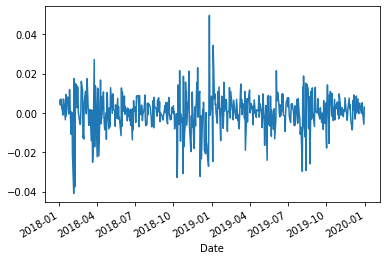

In [65]:
df['PCT change SPX'].plot()
plt.show()

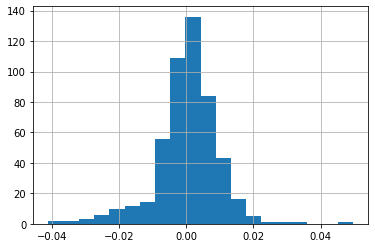

In [66]:
df['PCT change SPX'].hist(bins=20)


In [74]:
#Kurtosis is a measure of how fat the tails are
#( how often do the rare occurences happen) 
#+ve kurtosis indicateds fat tails, -ve indicates skinny tail(normal ditribuition)
mean=round(df['PCT change SPX'].mean(),5)
std=round(df['PCT change SPX'].std(),5)
kurtosis=round(df['PCT change SPX'].kurtosis(),5)
print('Mean SPX:{}, STD SPX:{}, Kurtosis SPX:{}'.format(mean,std,kurtosis))

mean2=round(df['PCT change TSLA'].mean(),5)
std2=round(df['PCT change TSLA'].std(),5)
kurtosis2=round(df['PCT change TSLA'].kurtosis(),5)
print('Mean TSLA:{}, STD TSLA:{}, Kurtosis TSLA:{}'.format(mean2,std2,kurtosis2))


Mean SPX:0.00041, STD SPX:0.00942, Kurtosis SPX:3.70229
Mean TSLA:0.00111, STD TSLA:0.03408, Kurtosis TSLA:5.02773


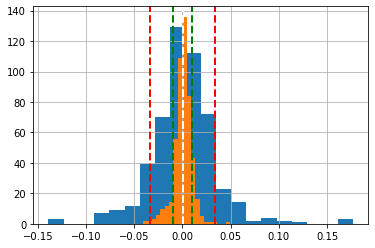

In [77]:
df['PCT change TSLA'].hist(bins=20)#blue

plt.axvline(mean,color='w', linestyle='dashed', linewidth=2)
plt.axvline(std2,color='r', linestyle='dashed', linewidth=2)
plt.axvline(-std2,color='r', linestyle='dashed', linewidth=2)

df['PCT change SPX'].hist(bins=20)#orange

plt.axvline(mean,color='w', linestyle='dashed', linewidth=2)
plt.axvline(std,color='g', linestyle='dashed', linewidth=2)
plt.axvline(-std,color='g', linestyle='dashed', linewidth=2)
plt.show()